In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None

In [4]:
df = pd.read_csv('train.csv')


In [5]:
# shape and data types of the data
print("Data shape",df.shape)



Data shape (1460, 81)


In [6]:
print("Data variables types",df.dtypes)

Data variables types Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object


In [7]:
# select numeric columns
df_numeric = df.select_dtypes(include=[np.number])
numeric_cols = df_numeric.columns.values
print(numeric_cols)

['Id' 'MSSubClass' 'LotFrontage' 'LotArea' 'OverallQual' 'OverallCond'
 'YearBuilt' 'YearRemodAdd' 'MasVnrArea' 'BsmtFinSF1' 'BsmtFinSF2'
 'BsmtUnfSF' 'TotalBsmtSF' '1stFlrSF' '2ndFlrSF' 'LowQualFinSF'
 'GrLivArea' 'BsmtFullBath' 'BsmtHalfBath' 'FullBath' 'HalfBath'
 'BedroomAbvGr' 'KitchenAbvGr' 'TotRmsAbvGrd' 'Fireplaces' 'GarageYrBlt'
 'GarageCars' 'GarageArea' 'WoodDeckSF' 'OpenPorchSF' 'EnclosedPorch'
 '3SsnPorch' 'ScreenPorch' 'PoolArea' 'MiscVal' 'MoSold' 'YrSold'
 'SalePrice']


In [8]:
# select non numeric columns
df_non_numeric = df.select_dtypes(exclude=[np.number])
non_numeric_cols = df_non_numeric.columns.values
print(non_numeric_cols)

['MSZoning' 'Street' 'Alley' 'LotShape' 'LandContour' 'Utilities'
 'LotConfig' 'LandSlope' 'Neighborhood' 'Condition1' 'Condition2'
 'BldgType' 'HouseStyle' 'RoofStyle' 'RoofMatl' 'Exterior1st'
 'Exterior2nd' 'MasVnrType' 'ExterQual' 'ExterCond' 'Foundation'
 'BsmtQual' 'BsmtCond' 'BsmtExposure' 'BsmtFinType1' 'BsmtFinType2'
 'Heating' 'HeatingQC' 'CentralAir' 'Electrical' 'KitchenQual'
 'Functional' 'FireplaceQu' 'GarageType' 'GarageFinish' 'GarageQual'
 'GarageCond' 'PavedDrive' 'PoolQC' 'Fence' 'MiscFeature' 'SaleType'
 'SaleCondition']


- Checking for missing values

created missing indicator for: LotFrontage
created missing indicator for: Alley
created missing indicator for: MasVnrType
created missing indicator for: MasVnrArea
created missing indicator for: BsmtQual
created missing indicator for: BsmtCond
created missing indicator for: BsmtExposure
created missing indicator for: BsmtFinType1
created missing indicator for: BsmtFinType2
created missing indicator for: Electrical
created missing indicator for: FireplaceQu
created missing indicator for: GarageType
created missing indicator for: GarageYrBlt
created missing indicator for: GarageFinish
created missing indicator for: GarageQual
created missing indicator for: GarageCond
created missing indicator for: PoolQC
created missing indicator for: Fence
created missing indicator for: MiscFeature


<AxesSubplot:xlabel='index'>

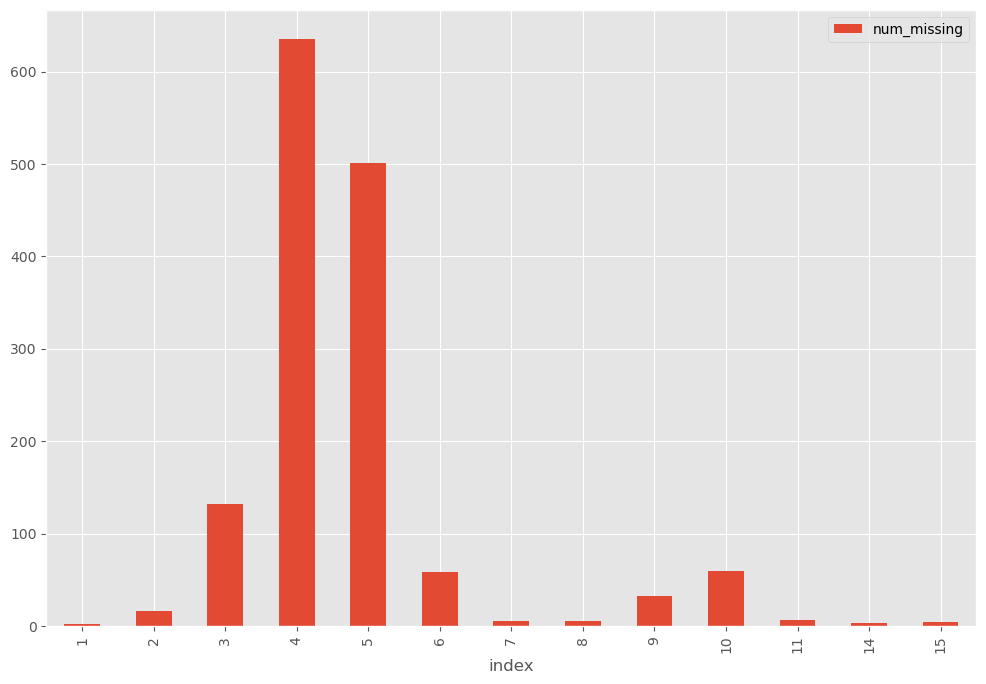

In [9]:
# creating a histogram to show missing values among all the dataset
 
# first create missing indicator for features with missing data
for col in df.columns:
    missing = df[col].isnull()
    num_missing = np.sum(missing)
    
    if num_missing > 0:  
        print('created missing indicator for: {}'.format(col))
        df['{}_ismissing'.format(col)] = missing


# then based on the indicator, plot the histogram of missing values
ismissing_cols = [col for col in df.columns if 'ismissing' in col]
df['num_missing'] = df[ismissing_cols].sum(axis=1)

df['num_missing'].value_counts().reset_index().sort_values(by='index').plot.bar(x='index', y='num_missing')

- From the histogram above, it is shown that there is NO observations **without** missing values
- Also, most observations has around **4 missing values**

In [10]:
# a function that calculates the percentage of missing values in numeric varibales that has missing values

df_missing_numeric = df_numeric[['LotFrontage','GarageYrBlt','MasVnrArea']].copy()
for col in df_missing_numeric.columns:
    pct_missing = np.mean(df_missing_numeric[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

LotFrontage - 18%
GarageYrBlt - 6%
MasVnrArea - 1%


<AxesSubplot:>

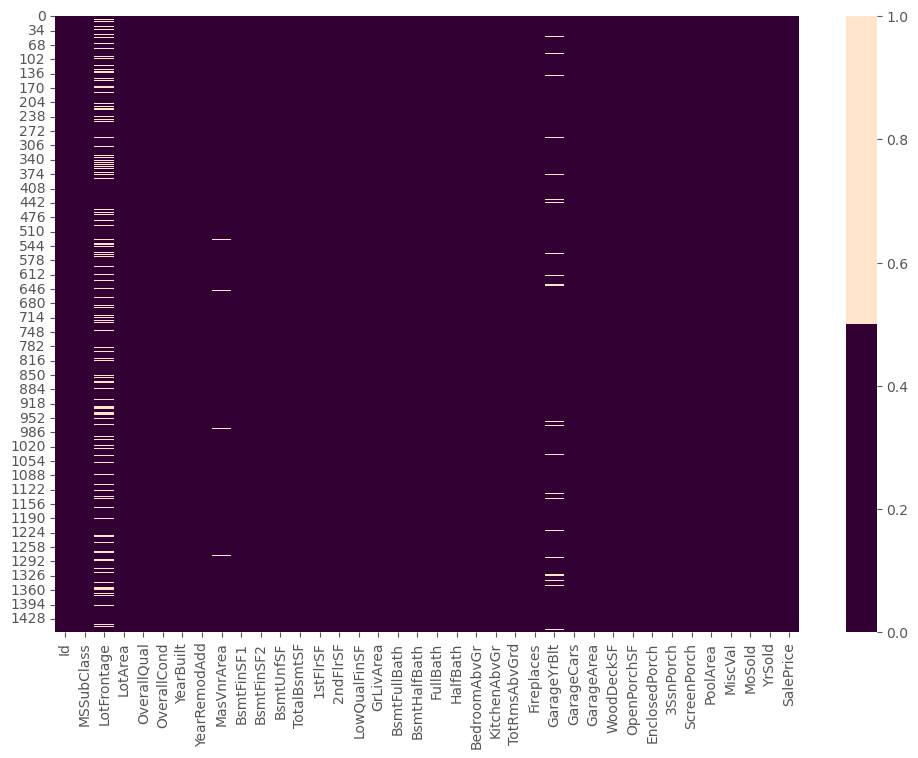

In [11]:
cols = df_numeric.columns[:39] # first 30 columns
colours = ['#330033', '#FFE5CC'] # specify the colours - beige is missing.  purple is not missing.
sns.heatmap(df[cols].isnull(), cmap=sns.color_palette(colours))

- Change 'NA to 'none'

In [12]:
df_numeric['GarageYrBlt'] = df_numeric['GarageYrBlt'].fillna("None")

- since variables **LotFrontage** & **MasVnrArea**  have missing values, we can change it to a valuable information indicating its missing

In [13]:
df['LotFrontage'] = df['LotFrontage'].fillna(-999)
df['MasVnrArea'] = df['MasVnrArea'].fillna(-999)


From the heatmap of numerical columns, it is noticed that, variables:

 - **LotFrontage**:' Linear feet of street connected to property' | has **18%** of missing values

 - **GarageYrBlt**: 'Year garage was built' |  has **6%** of missing values because 'GarageType was NA'

 - **MasVnrArea**: 'Masonry veneer area in square feet' | has **1%** of missing values, because of the low percentage we could consider to fill the missing values


<AxesSubplot:>

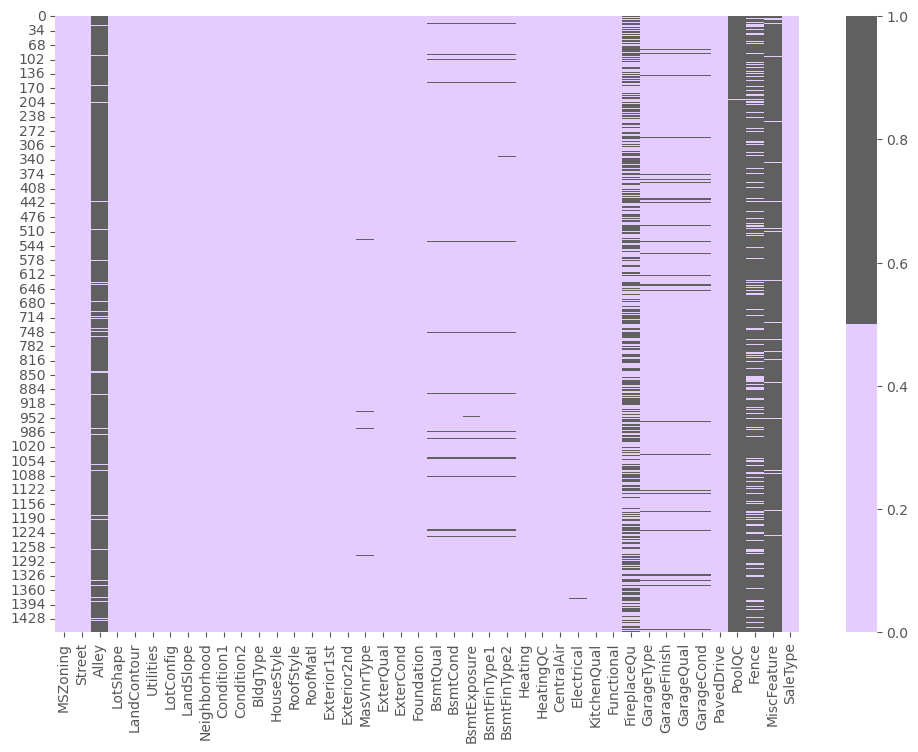

In [14]:
cols = df_non_numeric.columns[:42] # first 30 columns
colours = ['#E5CCFF', '#606060'] # specify the colours - grey is missing. purple is not missing.
sns.heatmap(df[cols].isnull(), cmap=sns.color_palette(colours))

From the heatmap of non-numerical columns, it is noticed that, variables:
- **PoolQC**: 'Pool quality' !NA is no pool!
- **MiscFeature**: 'Miscellaneous feature not covered in other categories'
- **Fence**: 'Fence quality'
- **FireplaceQu**: 'Fireplace quality'
- **Alley**: 'Type of alley access to property'  

 has the most of missing values, while,
 
 - **GarageType**: 'Masonry veneer area in square feet' 
 - **GarageFinish**:'Interior finish of the garage'
 - **GarageQual**:'Garage quality'
 - **GarageCond**'Garage condition'
 
  of some properties share the same missing values
 and, 
 - **BsmtQual**:'Baement Quality'
 - **BsmtCond**: 'Basement condition'
 - **BsmtExposure**: ' Refers to walkout or garden level walls'
 - **BsmtFinType1**:'Rating of basement finished area'
 - **BsmtFinType2**:'Rating of basement finished area (if multiple types)' 

 of some properties share the same missing values
 and,
 
 - **MasVnrType**:'Masonry veneer type' 
 has few missing values that could be filled
 

In [15]:
# a function that calculates the percentage of missing values in non numeric varibales that has missing values as shown in the heat map

df_missing_non_numeric = df_non_numeric[['PoolQC','MiscFeature','Fence','FireplaceQu','Alley','GarageType','GarageFinish','GarageQual','GarageCond','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','MasVnrType']].copy()
for col in df_missing_non_numeric.columns:
    pct_missing = np.mean(df_missing_non_numeric[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

PoolQC - 100%
MiscFeature - 96%
Fence - 81%
FireplaceQu - 47%
Alley - 94%
GarageType - 6%
GarageFinish - 6%
GarageQual - 6%
GarageCond - 6%
BsmtQual - 3%
BsmtCond - 3%
BsmtExposure - 3%
BsmtFinType1 - 3%
BsmtFinType2 - 3%
MasVnrType - 1%


- After inspection of high percentage variables , it was found that most them gave null because in the dataset they were given a value of 'NA' which was meant to be none
and python interepts NA as Null

 for this situation, NA can be changed to another value, for example 'None'




In [16]:

df_non_numeric['PoolQC'] = df_non_numeric['PoolQC'].fillna("None")
df_non_numeric['MiscFeature'] = df_non_numeric['MiscFeature'].fillna("None")
df_non_numeric['Fence'] = df_non_numeric['Fence'].fillna("None")
df_non_numeric['FireplaceQu'] = df_non_numeric['FireplaceQu'].fillna("None")
df_non_numeric['Alley'] = df_non_numeric['Alley'].fillna("None")
df_non_numeric['GarageType'] = df_non_numeric['GarageType'].fillna("None")
df_non_numeric['GarageCond'] = df_non_numeric['GarageCond'].fillna("None")
df_non_numeric['GarageFinish'] = df_non_numeric['GarageFinish'].fillna("None")
df_non_numeric['GarageQual'] = df_non_numeric['GarageQual'].fillna("None")
df_non_numeric['BsmtQual'] = df_non_numeric['BsmtQual'].fillna("None")
df_non_numeric['BsmtCond'] = df_non_numeric['BsmtCond'].fillna("None")
df_non_numeric['BsmtExposure'] = df_non_numeric['BsmtExposure'].fillna("None")
df_non_numeric['BsmtFinType1'] = df_non_numeric['BsmtFinType1'].fillna("None")
df_non_numeric['BsmtFinType2'] = df_non_numeric['BsmtFinType2'].fillna("None")
df_non_numeric['MasVnrType'] = df_non_numeric['MasVnrType'].fillna("None")

  








- check for missing values precentage in **non_numeric** after changing 'NA' to 'none'

In [17]:
df_missing_non_numeric = df_non_numeric[['PoolQC','MiscFeature','Fence','FireplaceQu','Alley','GarageType','GarageFinish','GarageQual','GarageCond','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','MasVnrType']].copy()
for col in df_missing_non_numeric.columns:
    pct_missing = np.mean(df_missing_non_numeric[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

PoolQC - 0%
MiscFeature - 0%
Fence - 0%
FireplaceQu - 0%
Alley - 0%
GarageType - 0%
GarageFinish - 0%
GarageQual - 0%
GarageCond - 0%
BsmtQual - 0%
BsmtCond - 0%
BsmtExposure - 0%
BsmtFinType1 - 0%
BsmtFinType2 - 0%
MasVnrType - 0%


In [18]:
df_non_numeric['PoolQC'].value_counts()

None    1453
Gd         3
Ex         2
Fa         2
Name: PoolQC, dtype: int64

In [19]:
df_non_numeric['MiscFeature'].value_counts()

None    1406
Shed      49
Gar2       2
Othr       2
TenC       1
Name: MiscFeature, dtype: int64

In [20]:
df_non_numeric['Utilities'].value_counts()

AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64

- **AllPub** All utilities
- **NoSeWa** Electricity and Gas Only

- Check for missing values after handeling them in **df_numeric** & **df_non_numeric**

created missing indicator for: LotFrontage
created missing indicator for: MasVnrArea


<AxesSubplot:xlabel='index'>

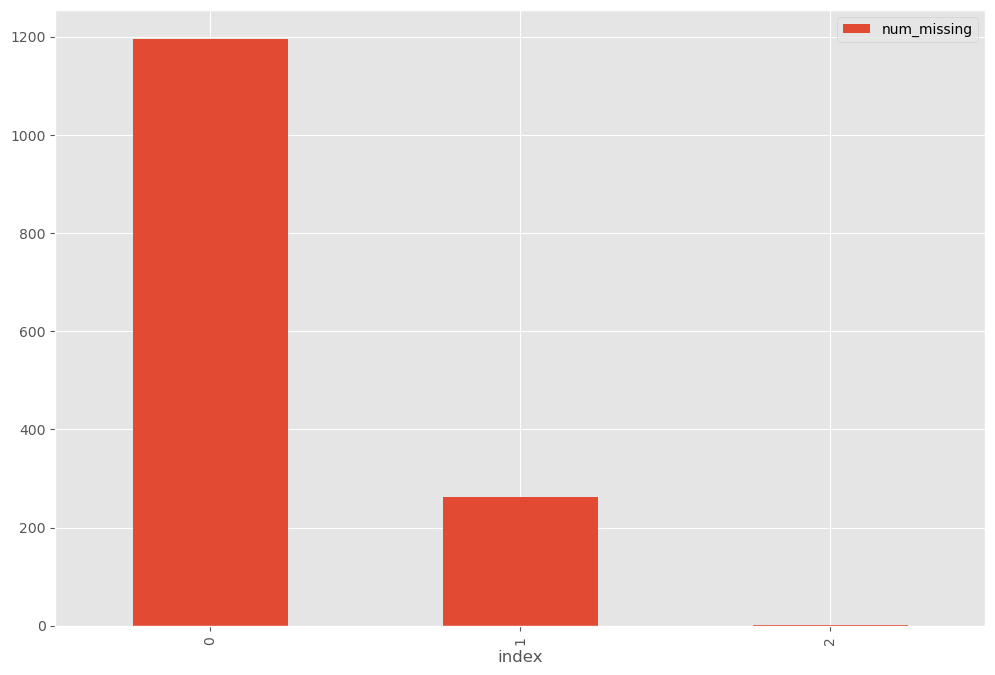

In [21]:
# creating a histogram to show missing values among all the dataset
 
# first create missing indicator for features with missing data
for col in df_numeric.columns:
    missing = df_numeric[col].isnull()
    num_missing = np.sum(missing)
    
    if num_missing > 0:  
        print('created missing indicator for: {}'.format(col))
        df_numeric['{}_ismissing'.format(col)] = missing


# then based on the indicator, plot the histogram of missing values
ismissing_cols = [col for col in df_numeric.columns if 'ismissing' in col]
df_numeric['num_missing'] = df_numeric[ismissing_cols].sum(axis=1)

df_numeric['num_missing'].value_counts().reset_index().sort_values(by='index').plot.bar(x='index', y='num_missing')

In [22]:
df_numeric['MasVnrArea'].value_counts()

0.0      861
180.0      8
72.0       8
108.0      8
120.0      7
        ... 
562.0      1
89.0       1
921.0      1
762.0      1
119.0      1
Name: MasVnrArea, Length: 327, dtype: int64

created missing indicator for: Electrical


<AxesSubplot:xlabel='index'>

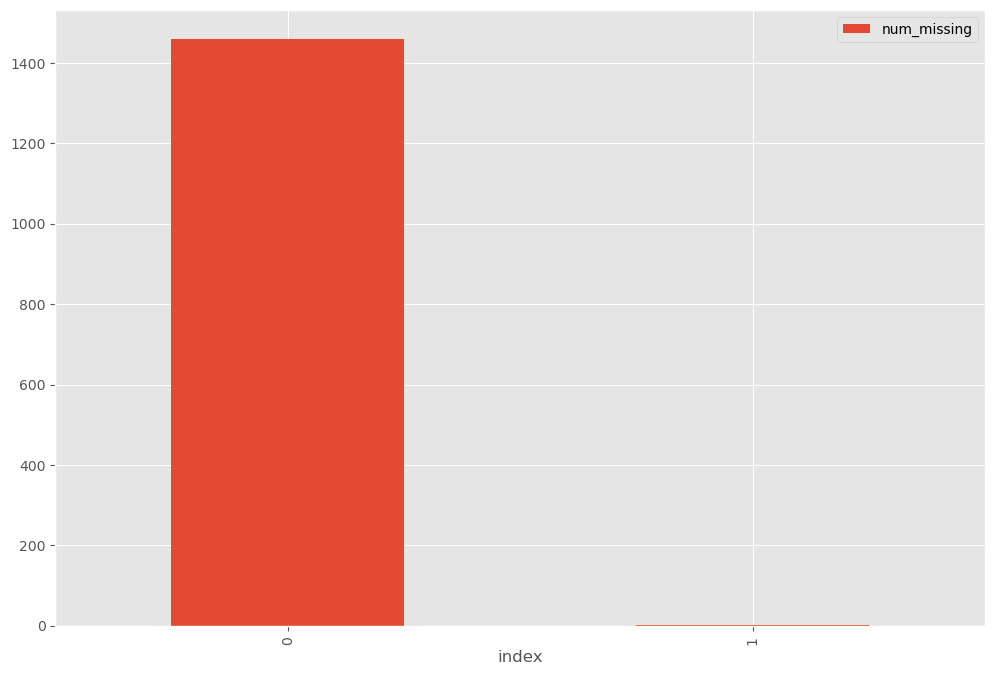

In [23]:
# creating a histogram to show missing values among all the dataset
 
# first create missing indicator for features with missing data
for col in df_non_numeric.columns:
    missing = df_non_numeric[col].isnull()
    num_missing = np.sum(missing)
    
    if num_missing > 0:  
        print('created missing indicator for: {}'.format(col))
        df_non_numeric['{}_ismissing'.format(col)] = missing


# then based on the indicator, plot the histogram of missing values
ismissing_cols = [col for col in df_non_numeric.columns if 'ismissing' in col]
df_non_numeric['num_missing'] = df_non_numeric[ismissing_cols].sum(axis=1)

df_non_numeric['num_missing'].value_counts().reset_index().sort_values(by='index').plot.bar(x='index', y='num_missing')

In [43]:
df_non_numeric.head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition,Electrical_ismissing,num_missing
0,RL,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,TA,TA,Y,None,None,None,WD,Normal,False,0
1,RL,Pave,None,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,TA,TA,Y,None,None,None,WD,Normal,False,0
2,RL,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,TA,TA,Y,None,None,None,WD,Normal,False,0
3,RL,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,TA,TA,Y,None,None,None,WD,Abnorml,False,0
4,RL,Pave,None,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,TA,TA,Y,None,None,None,WD,Normal,False,0


In [24]:
# df_handeled_missing  merge or not?

2- Check for **Outliers**
- Numerical

[Text(0, 0, 'Id'),
 Text(1, 0, 'MSSubClass'),
 Text(2, 0, 'LotFrontage'),
 Text(3, 0, 'LotArea'),
 Text(4, 0, 'OverallQual'),
 Text(5, 0, 'OverallCond'),
 Text(6, 0, 'YearBuilt'),
 Text(7, 0, 'YearRemodAdd'),
 Text(8, 0, 'MasVnrArea'),
 Text(9, 0, 'BsmtFinSF1'),
 Text(10, 0, 'BsmtFinSF2'),
 Text(11, 0, 'BsmtUnfSF'),
 Text(12, 0, 'TotalBsmtSF'),
 Text(13, 0, '1stFlrSF'),
 Text(14, 0, '2ndFlrSF'),
 Text(15, 0, 'LowQualFinSF'),
 Text(16, 0, 'GrLivArea'),
 Text(17, 0, 'BsmtFullBath'),
 Text(18, 0, 'BsmtHalfBath'),
 Text(19, 0, 'FullBath'),
 Text(20, 0, 'HalfBath'),
 Text(21, 0, 'BedroomAbvGr'),
 Text(22, 0, 'KitchenAbvGr'),
 Text(23, 0, 'TotRmsAbvGrd'),
 Text(24, 0, 'Fireplaces'),
 Text(25, 0, 'GarageCars'),
 Text(26, 0, 'GarageArea'),
 Text(27, 0, 'WoodDeckSF'),
 Text(28, 0, 'OpenPorchSF'),
 Text(29, 0, 'EnclosedPorch'),
 Text(30, 0, '3SsnPorch'),
 Text(31, 0, 'ScreenPorch'),
 Text(32, 0, 'PoolArea'),
 Text(33, 0, 'MiscVal'),
 Text(34, 0, 'MoSold'),
 Text(35, 0, 'YrSold'),
 Text(36, 0, 'S

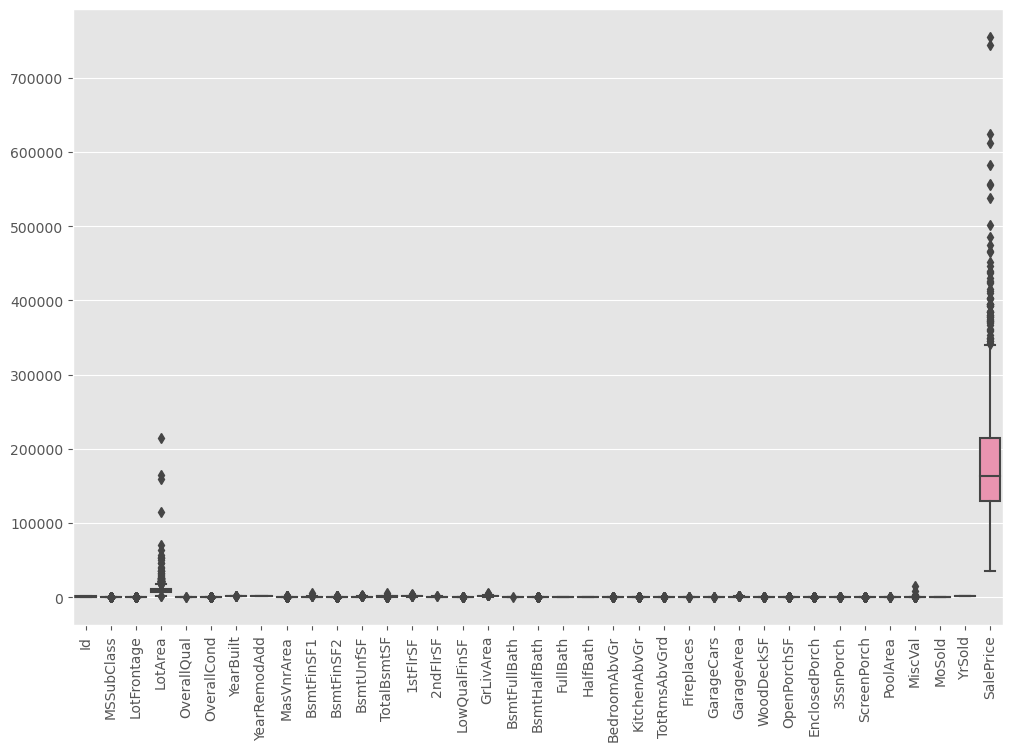

In [34]:
ax = sns.boxplot(data=df_numeric[['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual' ,'OverallCond',
 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
 'BsmtUnfSF' ,'TotalBsmtSF', '1stFlrSF' ,'2ndFlrSF', 'LowQualFinSF',
 'GrLivArea' ,'BsmtFullBath', 'BsmtHalfBath' ,'FullBath', 'HalfBath',
 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd' ,'Fireplaces', 'GarageYrBlt',
 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch',
 '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold' ,'YrSold',
 'SalePrice' ]])
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='LotArea'>

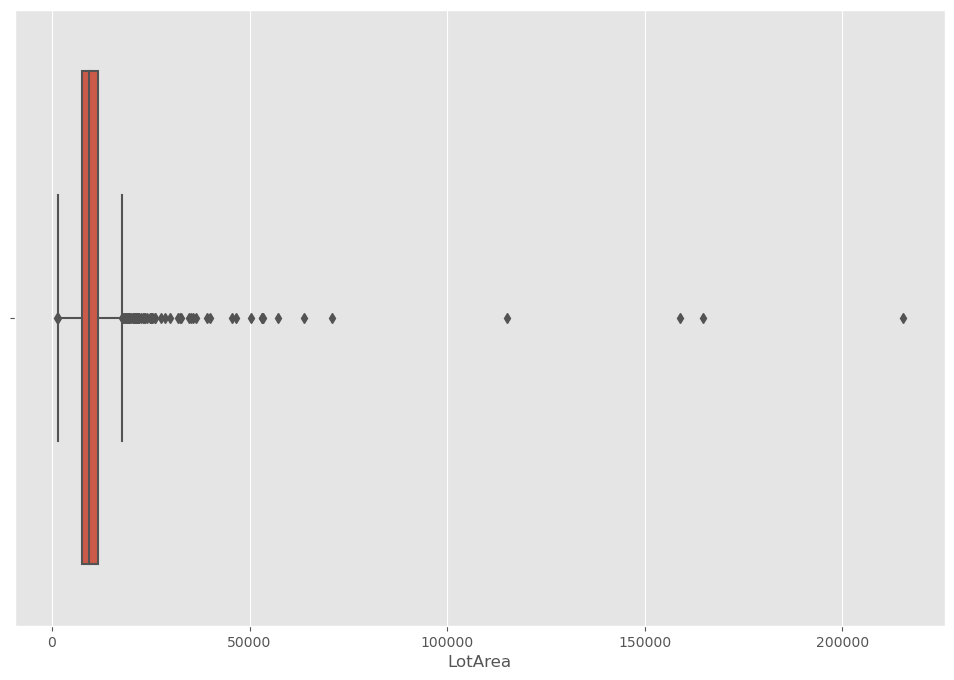

In [47]:
sns.boxplot(df['LotArea'])

In [45]:
df_numeric.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,num_missing
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890,0.182877
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883,0.390227
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000,0.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000,0.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000,0.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000,0.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000,2.000000


- the max of **LotFrontage** is 313 while the 25% is 59
- the max of **salesprice** is 755000 while the 25% is 129975

<AxesSubplot:xlabel='MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition,Electrical_ismissing,num_missing'>

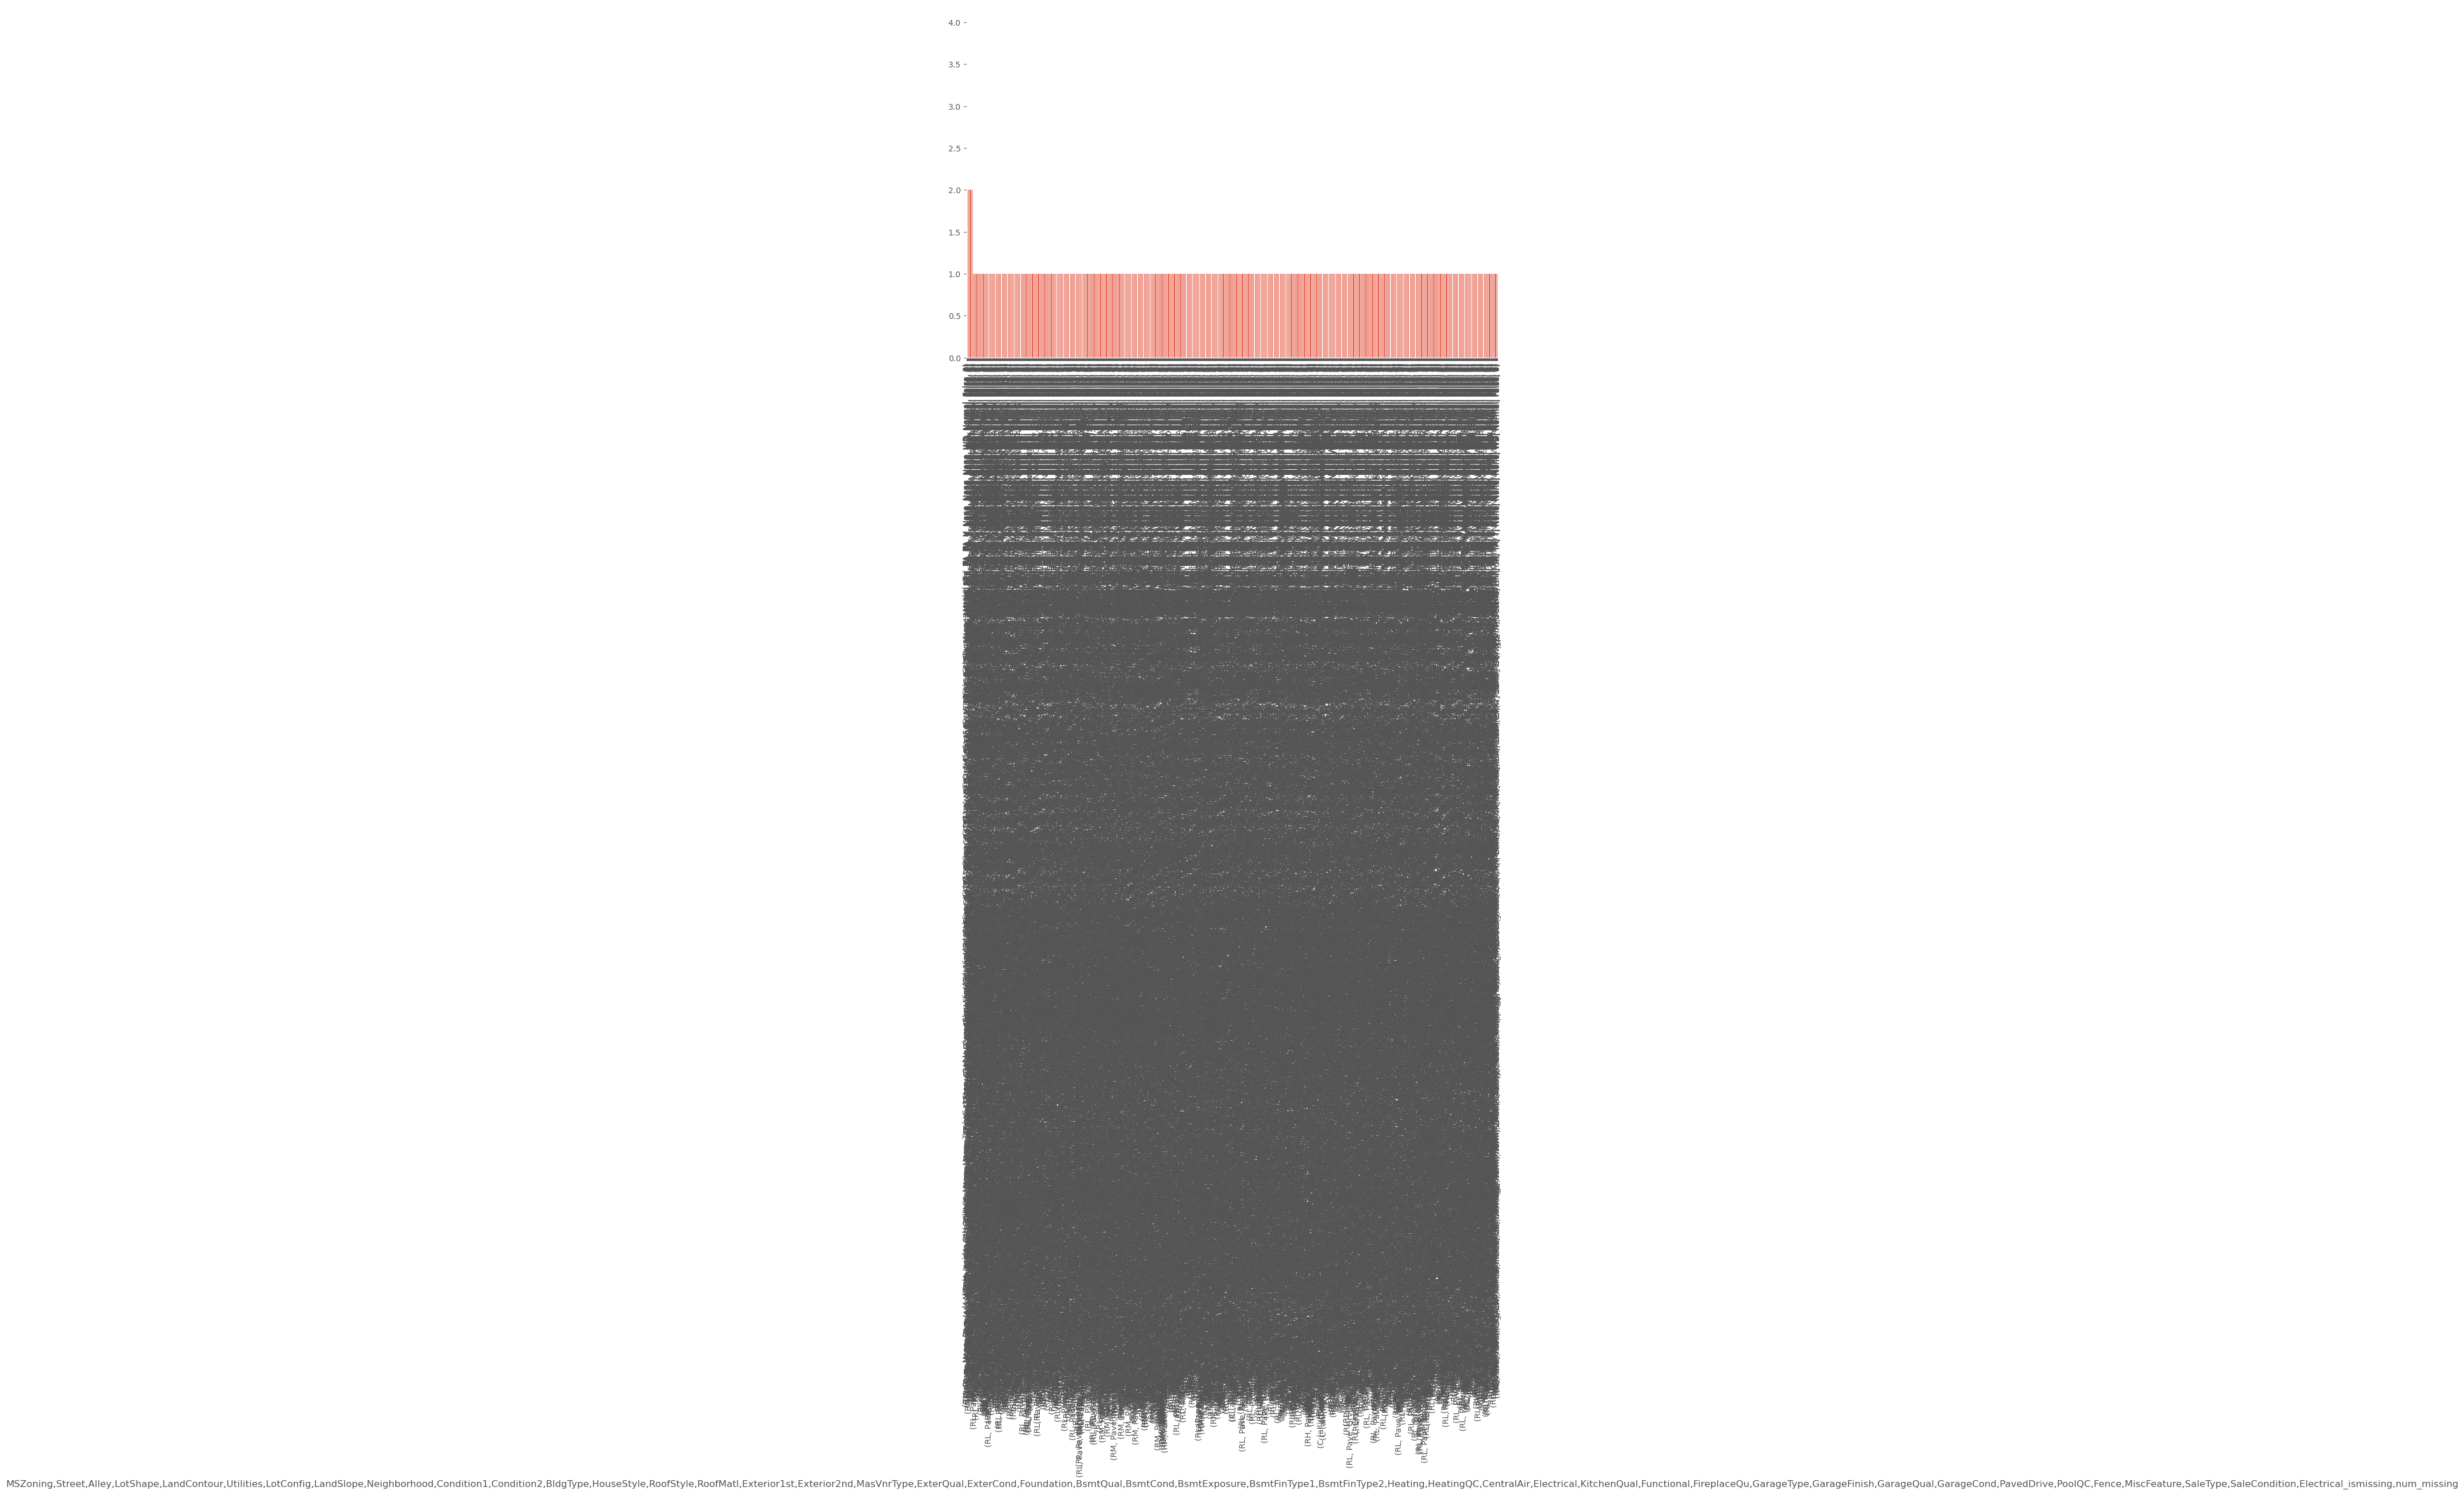

In [46]:
# bar chart -  distribution of a categorical variable
df_non_numeric.value_counts().plot.bar()

- Non-numerical